In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import h5py
import scib
import scipy.io as sio

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3,3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.0
deprecated          1.2.12
executing           1.2.0
google              NA
h5py                3.7.0
igraph              0.10.2
ipykernel           6.23.1
jedi                0.18.2
joblib              1.0.1
kiwisolver          1.3.1
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.4.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.3
numpy               1.22.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.38
psutil              5.

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
dataset_name = ["cell_lines", "panc8_rm", "uc3", "crc"]

In [4]:
i=2
re=0.1

In [5]:
# load raw data
adata_raw = sc.read_h5ad('/home/suyanchi/project/dab/data/batch/'+dataset_name[i]+'.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 576 × 16594
    obs: 'celltype', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
dat_sc = sio.loadmat('/home/suyanchi/project/dab/results/'+dataset_name[i]+'.mat')
dat_sc['re']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.5414298 , 2.445487  , 2.163144  , ..., 0.84947664, 1.291545  ,
        0.3412228 ],
       ...,
       [0.37924224, 0.06744798, 0.60379696, ..., 1.6207783 , 1.6441262 ,
        1.8850547 ],
       [1.3028973 , 1.1794231 , 1.0323879 , ..., 1.0549245 , 1.1795685 ,
        1.0119252 ],
       [2.1906598 , 2.0154793 , 1.8196499 , ..., 0.34576398, 0.6528119 ,
        0.11831882]], dtype=float32)

In [7]:
adata_raw.X = dat_sc['re'].T

In [8]:
sc.pp.pca(adata_raw)
sc.pp.neighbors(adata_raw)
sc.tl.umap(adata_raw)

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


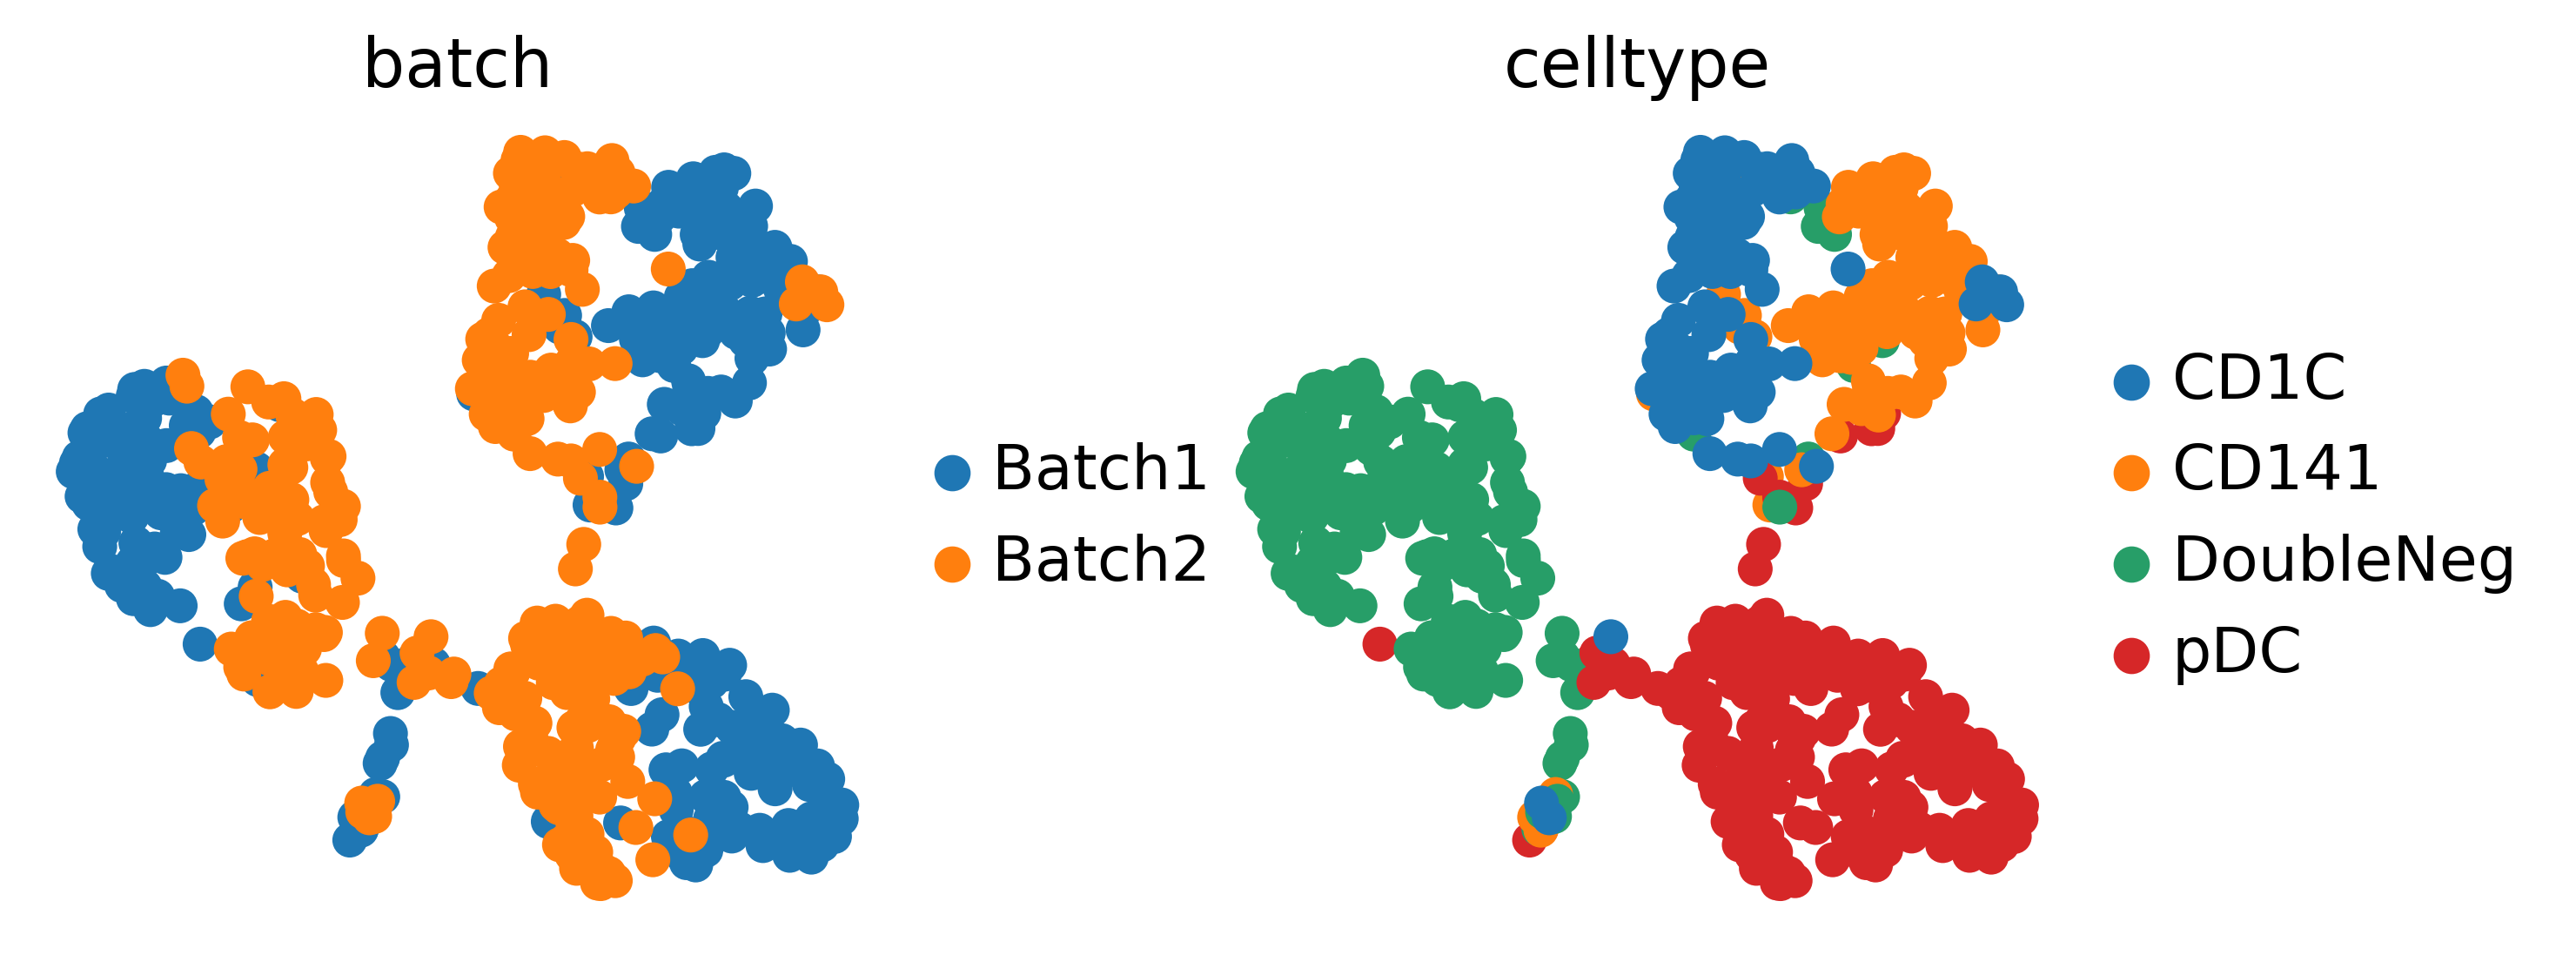

In [9]:
sc.pl.umap(adata_raw, color=['batch', 'celltype'], palette=sc.pl.palettes.vega_20_scanpy)

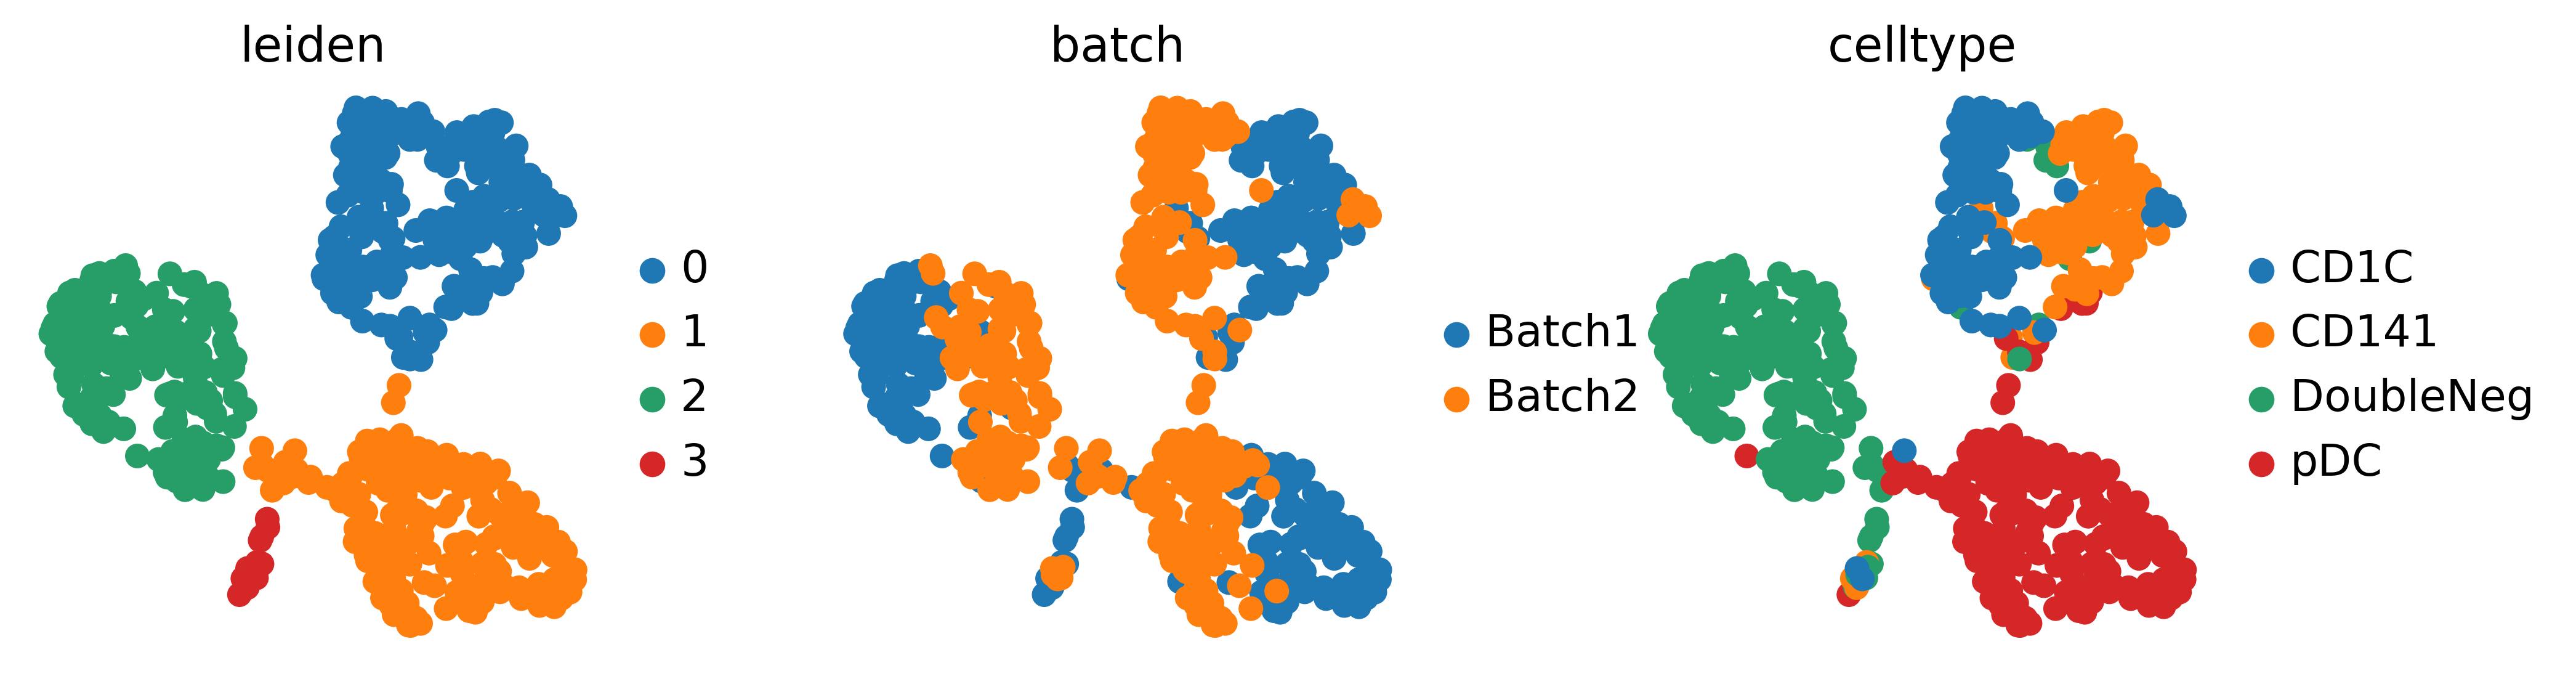

In [10]:
sc.tl.leiden(adata_raw, resolution=re)
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'celltype'])

In [11]:
ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
asw = scib.metrics.silhouette(adata_raw, label_key='celltype', embed='X_pca')
b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='celltype', embed='X_pca', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

ARI: 0.6951, NMI: 0.6904, ASW: 0.6594, batch-ASW: 0.7206


/tmp/ipykernel_131025/2637992958.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='cel

In [12]:
%%time
sc.external.pp.bbknn(adata_raw, batch_key='batch')
# adata_raw = sc.external.pp.mnn_correct(adata_raw, batch_key='batch')
adata_raw

CPU times: user 873 ms, sys: 4.94 s, total: 5.81 s
Wall time: 89.2 ms


AnnData object with n_obs × n_vars = 576 × 16594
    obs: 'celltype', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [13]:
sc.tl.umap(adata_raw)

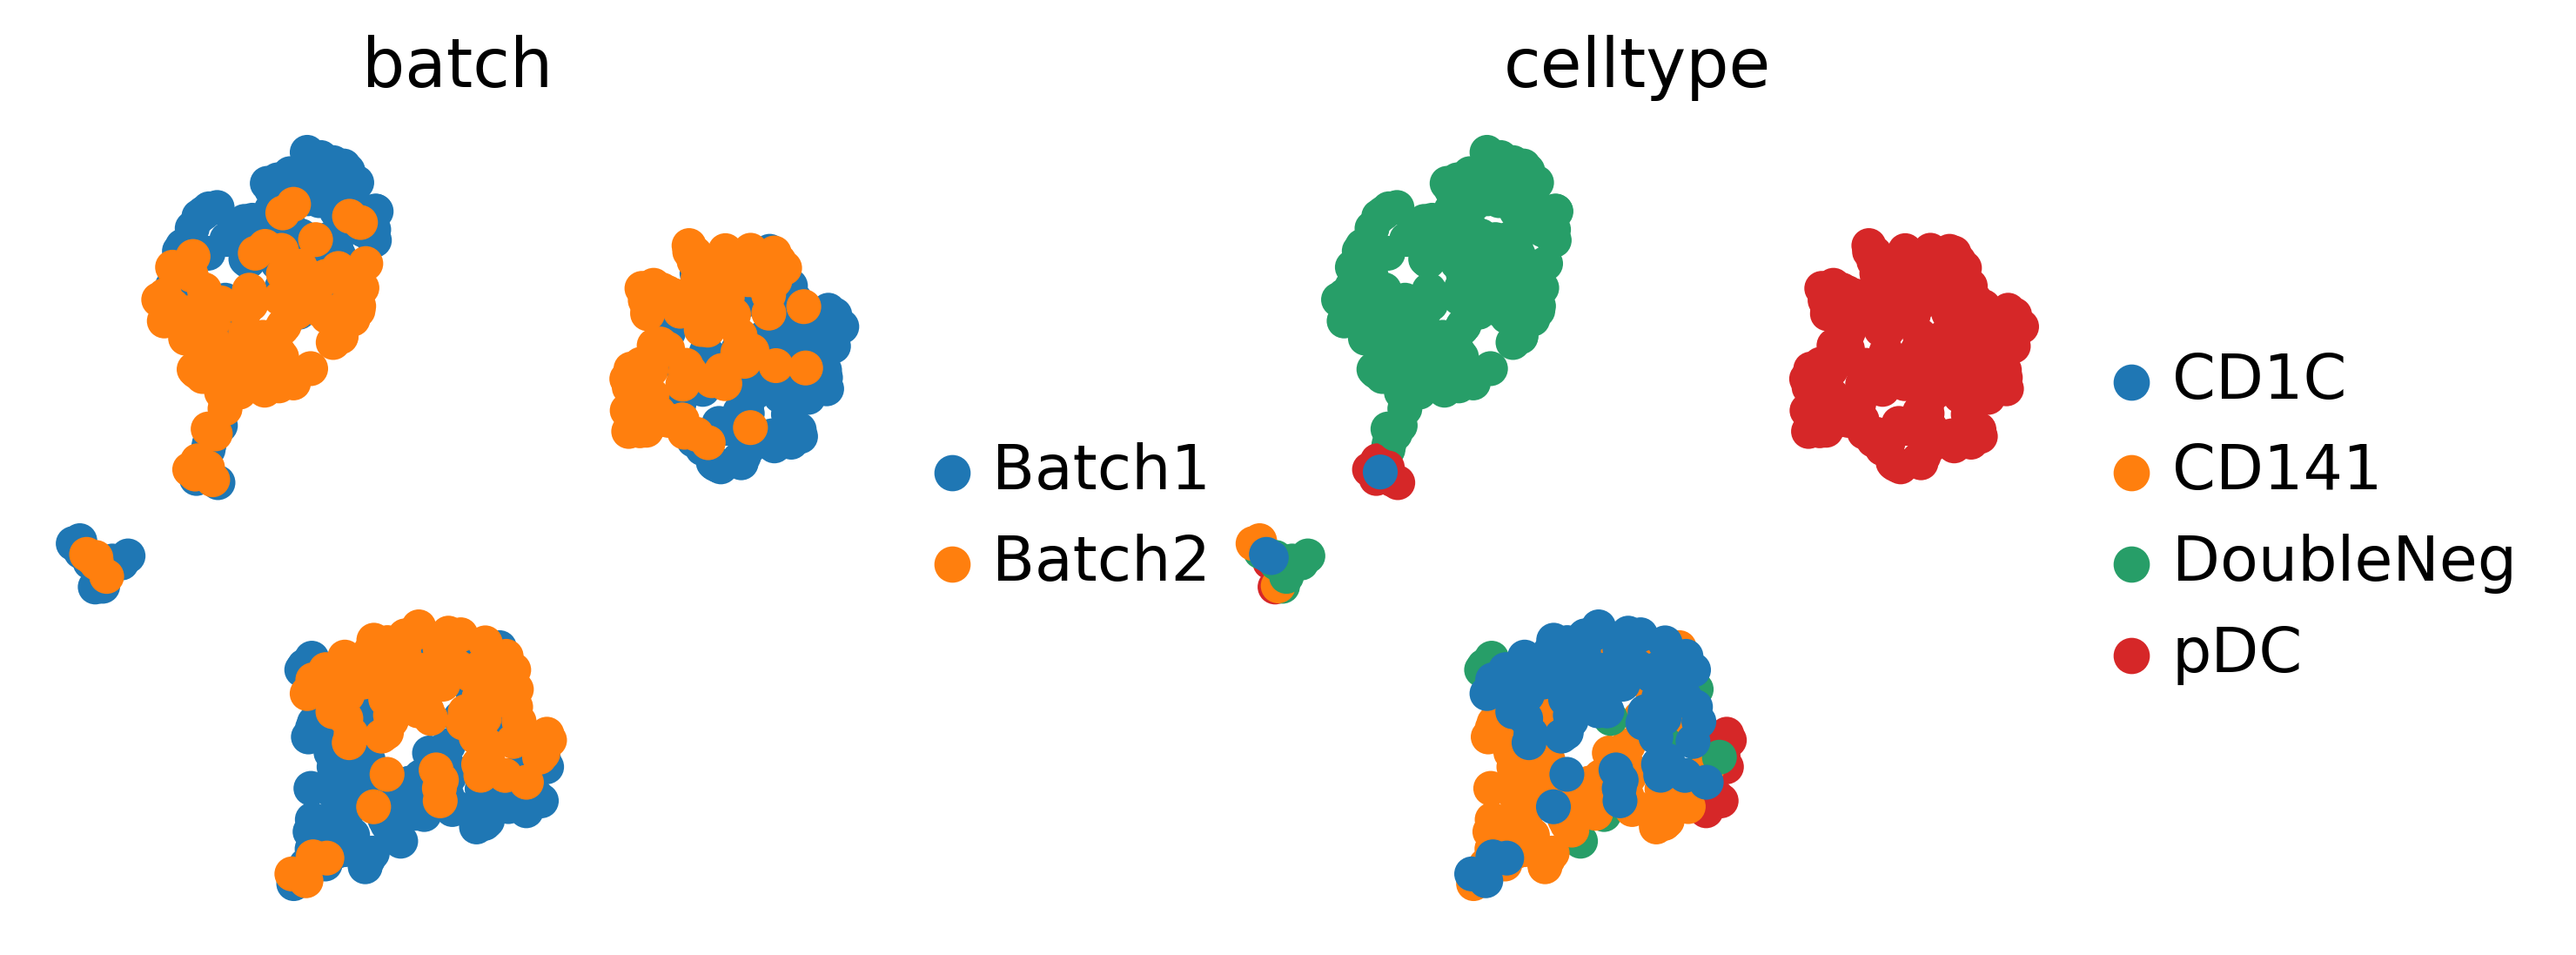

In [14]:
sc.pl.umap(adata_raw, color=['batch', 'celltype'])

In [31]:
sc.tl.leiden(adata_raw, resolution=re)

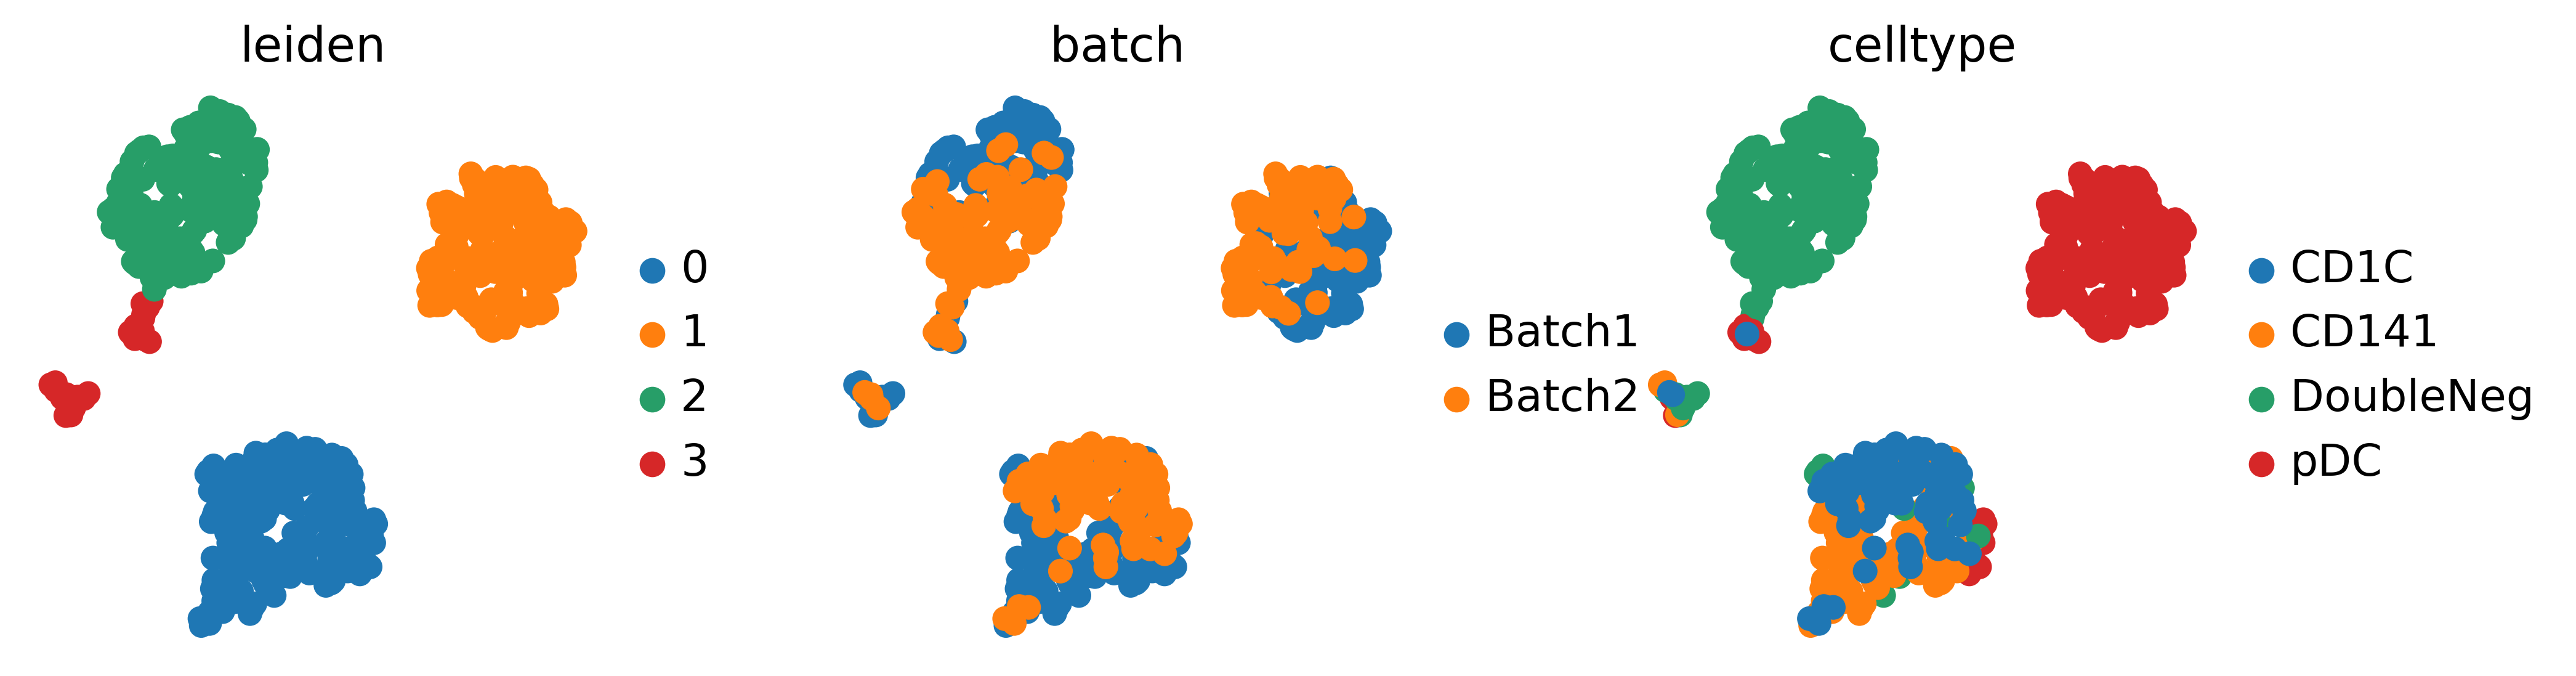

In [32]:
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'celltype'])

In [33]:
ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
asw = scib.metrics.silhouette(adata_raw, label_key='celltype', embed='X_pca')
b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='celltype', embed='X_pca', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

ARI: 0.6788, NMI: 0.6948, ASW: 0.6594, batch-ASW: 0.7206


/tmp/ipykernel_131025/2637992958.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_131025/2637992958.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='cel

In [21]:
df = pd.read_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', header=0, index_col=0)
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.451937,0.605540,0.644664,0.762034
0,alra,0.435421,0.571157,0.630391,0.765428
0,dca,0.337435,0.538788,0.550592,0.749878
0,deepimpute,0.540515,0.637377,0.644454,0.761541
0,magic,0.333968,0.547809,0.743337,0.426035
0,saver,0.441606,0.595436,0.644728,0.762063
0,scimpute,0.480561,0.611650,0.591730,0.768893
0,scscope,0.426544,0.583740,0.567546,0.556556
0,scvi,0.475369,0.586602,0.647541,0.724898


In [22]:
# combineing results 
df1 = pd.DataFrame({'Methods': ['bis'],
                   'ARI': [ari],
                   "NMI": [nmi],
                   "ASW": [asw],
                   "b_ASW": [b_asw]})
df = pd.concat([df, df1])
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.451937,0.605540,0.644664,0.762034
0,alra,0.435421,0.571157,0.630391,0.765428
0,dca,0.337435,0.538788,0.550592,0.749878
0,deepimpute,0.540515,0.637377,0.644454,0.761541
0,magic,0.333968,0.547809,0.743337,0.426035
0,saver,0.441606,0.595436,0.644728,0.762063
0,scimpute,0.480561,0.611650,0.591730,0.768893
0,scscope,0.426544,0.583740,0.567546,0.556556
0,scvi,0.475369,0.586602,0.647541,0.724898
0,bis,0.678822,0.694823,0.659375,0.720647


In [23]:
adata_raw.write('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_bis.h5ad')